# ****IMPORT SOME NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()

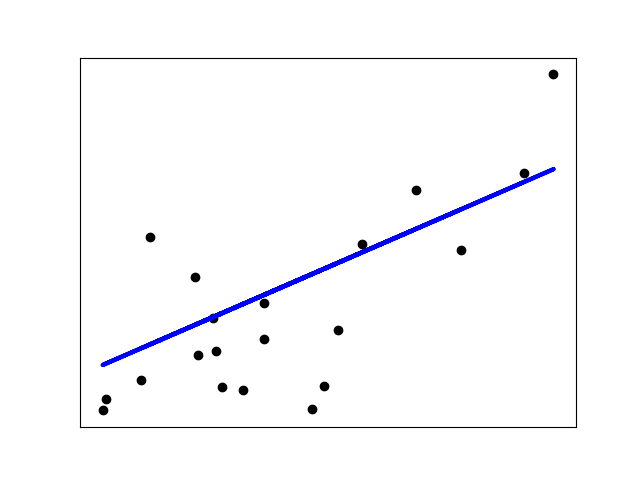

import dataset:

In [ ]:
df = pd.read_csv("../input/advertisingcsv/Advertising.csv")

# UNDERSTANDING THE DATA-SET

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.describe().T

1. Checking  missing value

In [ ]:
df.isnull().values.any()
df.isnull().sum()

There is no missing value in data set.

2. Data Cleaning

2.1. Drop unnecessary columns

In [ ]:
df.head()

As seen ""Unnamed: 0" . it is unnecessary variable.

In [ ]:
drop_list = ["Unnamed: 0"]

df = df.drop(drop_list, axis=1)

df.columns

Checking main assumptions of Linear Regression: linearity, normality, and multicollinearity.

1) Assumption  (Linearity)

In [ ]:
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")

In [ ]:
df.hist(bins=20)

In [ ]:
sns.lmplot('TV','Sales',data=df)
sns.lmplot('Radio','Sales',data=df)
sns.lmplot('Newspaper','Sales',data=df)

2) Assumption  (Normality):

In [ ]:
sns.distplot(df.Sales,bins=10,color="blue",hist=True)

3) Assumption (Multicollinearity):

In [ ]:
num_cols = df[["TV","Radio","Newspaper"]]
a = df.corr()['Sales'].sort_values(ascending=False)
print(a)

Correlation of variables with Heatmap

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin = 0,vmax=1,square=True,cmap="YlGnBu",ax=ax)
plt.show()

As seen above, there is no multicollinearity among independent/dependent variables.

# MODELLING

In [ ]:
X = df.drop('Sales', axis=1)
y = df[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


models = [('LinearRegression', LinearRegression())]

In [ ]:
lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper",data=df).fit()

print(lin_model.params,"\n")
print(lin_model.summary())

Evaluate the model

In [ ]:
results = []
names = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)